In [1]:
import json
from sklearn.manifold import TSNE
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt
CBOW=True
if CBOW==True:
    vocab_file ="./data/cbow_words.json"
    model_file ="./data/cbow_model.json"
    img_path="data/cbow.png"
else:
    vocab_file ="./data/svd_vocab.json"
    model_file ="./data/svd_model.json"
    img_path="data/svd.png"

In [2]:
with open(vocab_file) as f:
    vocab = json.load(f)

In [3]:
vocab[:20]

['i',
 'the',
 'it',
 'great',
 'one',
 'good',
 's',
 'use',
 'this',
 'like',
 'would',
 'works',
 'well',
 'get',
 'camera',
 'case',
 'price',
 'quality',
 'sound',
 'also']

In [4]:
with open(model_file) as f:
    model = json.load(f)

In [5]:
similarity={}
for word in vocab:
    a = model["camera"]
    b = model[word]
    if word == "camera":
        continue
    similarity[word]= np.dot(a, b)/(norm(a)*norm(b))

In [6]:
sorted_words = [k for k, v in sorted(similarity.items(), key=lambda item: item[1], reverse=True)]

In [7]:
sorted_words[:20]

['cameras',
 'cam',
 'dslr',
 'camcorder',
 'dlsr',
 'cams',
 'slr',
 'd90',
 'camerasand',
 'dslrs',
 'slrs',
 'canon',
 'shoot',
 'digicam',
 't2i',
 'nikon',
 '2mp',
 'd800',
 'photography',
 'shooting']

In [8]:
test_words= ["tv","sleeping","bed","room","bedroom","night","camcorder","camera","photographer","clarity","video","refridgerator","pizza","cool","kitchen","wife"]
X=[model[w] for w in test_words]

In [9]:
X = TSNE(n_components=2).fit_transform(X)

In [10]:
y = [i[1] for i in X]
x = [i[0] for i in X]

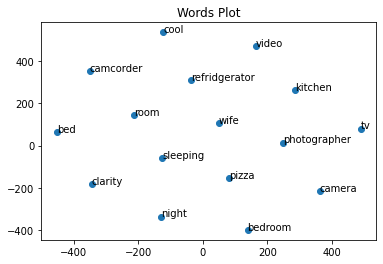

In [11]:
plt.figure(facecolor="white")
plt.scatter(x,y)
plt.title("Words Plot")
for i, label in enumerate(test_words):
    plt.annotate(label, (x[i], y[i]))
plt.savefig(img_path,dpi=300)
plt.show()